# Play with one dimensional convolution

In [1]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from scipy import signal

# Check PyTorch version
print(torch.__version__)

2.3.1


## One Dimensional Convolution using SciPy

In [10]:
x = np.array([1, 5, 3, 4, 8])
w = np.array([1 / 3, 1 / 3, 1 / 3])
y = signal.convolve(x, w, mode="valid")
print(type(x[0]))
print(x, y)

<class 'numpy.int32'>
[1 5 3 4 8] [3. 4. 5.]


In [11]:
w = np.array([.25, .5, .25])
y = signal.convolve(x, w, mode="valid")
print(type(x[0]))
print(x, y)

<class 'numpy.int32'>
[1 5 3 4 8] [3.5  3.75 4.75]


[Online Convolution calculator](https://www.rapidtables.com/calc/math/convolution-calculator.html)

## Convolution using PyTorch

### Tensors for time series

Timeseries data or sequence data—Rank-3 tensors of shape **(samples, timesteps, features)**, where each sample is a sequence (of length timesteps) of feature vectors.

For example consider a traffic dataset where we have several sensors collecting data over time. In this dataset, the traffic features include measurements such as speed, vehicle volume, and possibly other metrics, gathered from $N$ different sensors over $T$ time steps. Here’s how you might structure the analysis and modeling with this dataset.

#### Example Traffic Dataset Structure

1. **Dataset Overview**:
   - **Sensors**: Each sensor monitors traffic metrics at specific locations.
   - **Time Steps**: Data is collected at regular intervals (e.g., every minute, hourly).

2. **Features**:
   - **Speed**: Average speed of vehicles at each sensor (e.g., in miles per hour).
   - **Volume**: Number of vehicles passing by each sensor in a given time.
   - **Additional Features**: Could include factors such as occupancy, vehicle types, day of the week, weather conditions, etc.

3. **Data Representation**:
   - The dataset could be represented in a three-dimensional array:
     - **Shape**: $N \times T \times F$
     - Where $N$ is the number of sensors, $T$ is the number of time steps, and $F$ represents the features being measured (speed, volume, etc.).

In [13]:
# Reshape it to match the input shape of Conv1d
x = np.reshape(x, (1, 1, 5))  # (samples, timesteps, features)
x_tensor = torch.from_numpy(x)  # Convert to PyTorch tensor

# Define a model with one Conv1d layer
w = torch.tensor([1 / 3, 1 / 3, 1 / 3]).view(1, 1, 3) 
conv1d = nn.Conv1d(1, 1, 3, bias=False)
conv1d.weight.data = w  # Initialize weights
print(conv1d.weight.data)


tensor([[[0.3333, 0.3333, 0.3333]]])


In [4]:
y_tensor = conv1d(x_tensor)  # Apply the Conv1d layer to the input tensor
print(y_tensor.shape, y_tensor)  # Print the shape of the output tensor

torch.Size([1, 1, 3]) tensor([[[3., 4., 5.]]], grad_fn=<ConvolutionBackward0>)


## Applying 1D Conv. on a noisy sin wave signal

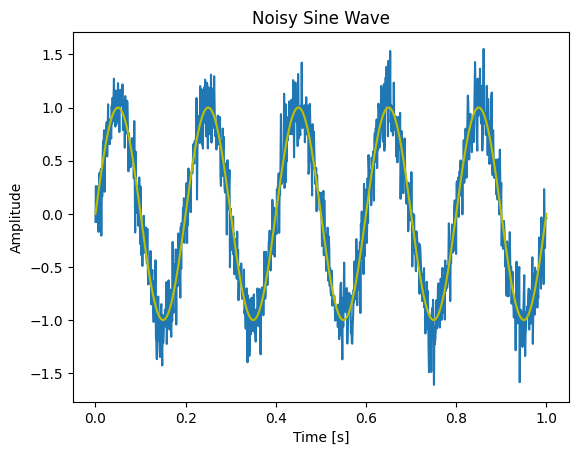

In [5]:
# Generate a clean sine wave
t = np.linspace(0, 1, 1000)
frequency = 5
clean_signal = np.sin(2 * np.pi * frequency * t)

# Corrupt with noise
noise = np.random.normal(0, 0.2, clean_signal.shape)
x = clean_signal + noise

plt.plot(t, x)
plt.plot(t, clean_signal, 'y')
plt.title('Noisy Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


(1000,) (998,)


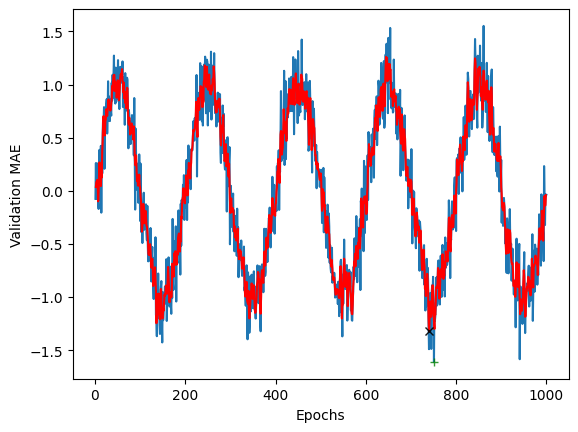

In [6]:
w = np.array([1 / 3, 1 / 3, 1 / 3])

# Define model
conv1d = nn.Conv1d(1, 1, 3, bias=False)
conv1d.weight.data = torch.tensor(w).view(1, 1, 3)

X = np.reshape(x, (1, 1, len(x)))  # Reshape to (samples, timesteps, features)
X_tensor = torch.from_numpy(X)
y_tensor = conv1d(torch.from_numpy(X))
y = y_tensor.detach().numpy().squeeze()  # Convert back to NumPy and squeeze
print(x.shape, y.shape)

plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x) + 1, np.min(x), "g+", alpha=0.8)
plt.plot(range(2, len(y) + 2), y, "r")
plt.plot(np.argmin(y) + 2, np.min(y), "kx", alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()



738 -1.156872569129415


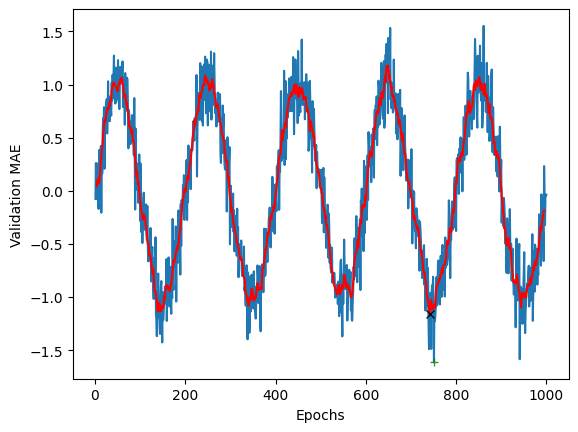

In [7]:
# Second convolution with larger kernel size
w = np.ones((9)) / 9
conv1d = nn.Conv1d(1, 1, 9, bias=False)
conv1d.weight.data = torch.tensor(w).view(1, 1, 9)

X_tensor = torch.from_numpy(X)
y_tensor = conv1d(X_tensor)
y = y_tensor.detach().numpy().squeeze()
print(np.argmin(y), np.min(y))

plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x) + 1, np.min(x), "g+", alpha=0.8)
plt.plot(range(9 // 2, len(y) + 9 // 2), y, "r")
plt.plot(np.argmin(y) + 9 // 2, np.min(y), "kx", alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


131 -1.0394061087769686


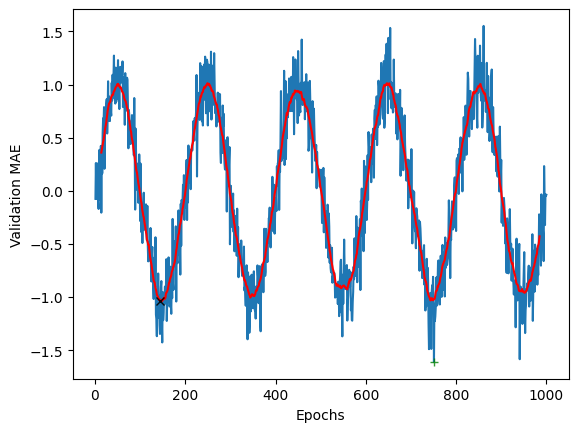

In [8]:

# Third convolution with kernel size of 29
w = np.ones((29)) / 29
conv1d = nn.Conv1d(1, 1, 29, bias=False)
conv1d.weight.data = torch.tensor(w).view(1, 1, 29)

X_tensor = torch.from_numpy(X)#.float()
y_tensor = conv1d(X_tensor)
y = y_tensor.detach().numpy().squeeze()
print(np.argmin(y), np.min(y))

plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x) + 1, np.min(x), "g+", alpha=0.8)
plt.plot(range(29 // 2, len(y) + 29 // 2), y, "r")
plt.plot(np.argmin(y) + 29 // 2, np.min(y), "kx", alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()
